In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import seaborn as sns

In [3]:
df_train = pd.read_csv('train.csv')

In [4]:
df_test = pd.read_csv('test.csv')

In [6]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
surv = df_train.groupby('Survived').count().reset_index()
# len(df_train)

In [29]:
surv['Total']=surv['PassengerId']

In [30]:
surv.head()

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Total
0,0,549,549,549,549,424,549,549,549,549,68,549,549
1,1,342,342,342,342,290,342,342,342,342,136,340,342


Text(0, 0.5, 'Counts')

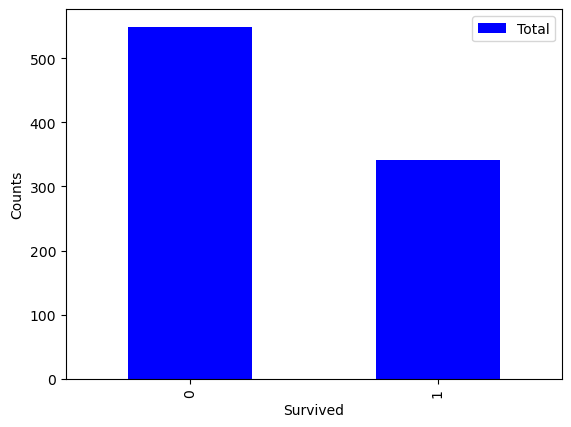

In [34]:
surv.plot(kind='bar',x='Survived',y='Total',color='blue')
plt.ylabel('Counts')

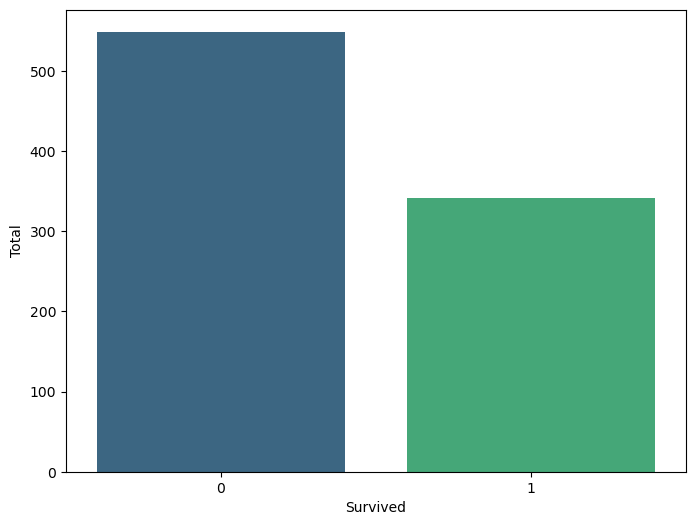

In [40]:
plt.figure(figsize=(8,6))
sns.barplot(x='Survived',y='Total',data=surv, palette='viridis')
plt.show()

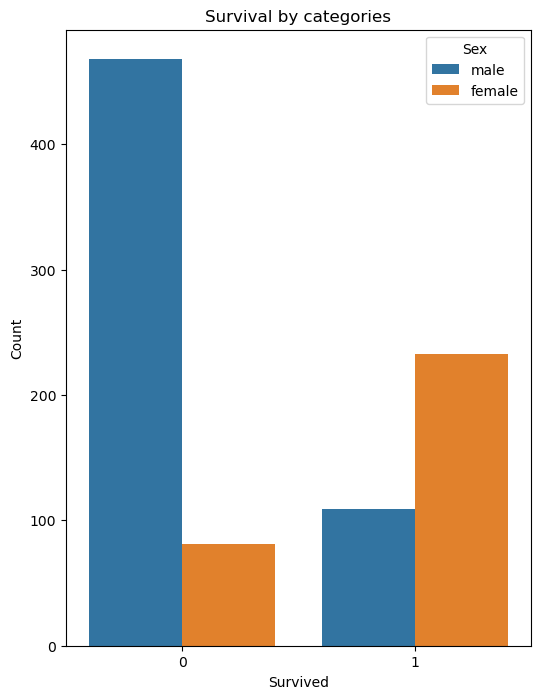

In [46]:
plt.figure(figsize=(6,8))
sns.countplot(x='Survived',hue='Sex',data=df_train)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival by categories')
plt.legend(title='Sex',loc='upper right')
plt.show()

In [47]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [56]:
ages = df_train.groupby('Age').size().reset_index(name='Count').sort_values('Age',ascending=True)
ages.head()

,Age,Count
0,0.42,1
1,0.67,1
2,0.75,2
3,0.83,2
4,0.92,1


Text(0.5, 1.0, 'Bar plot according to age')

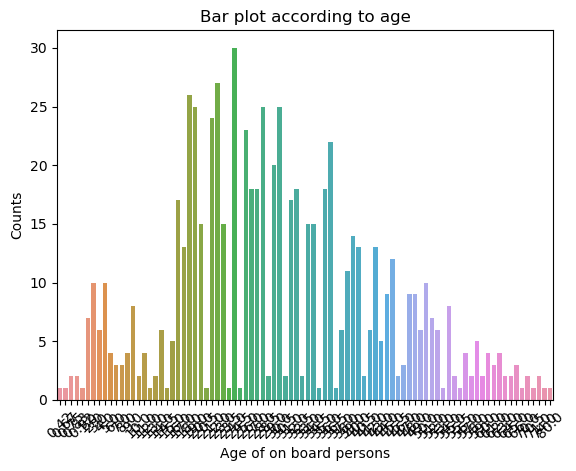

In [67]:
sns.barplot(x='Age',y='Count',data=ages)
plt.xticks(rotation=45)
plt.xlabel('Age of on board persons')
plt.ylabel('Counts')
plt.title('Bar plot according to age')

Barplot not looking good since there are many categories. Let's try to create a histogram instead, so there are less values on the x axis.

Text(0.5, 1.0, "Histogram of person's ages on Titanic")

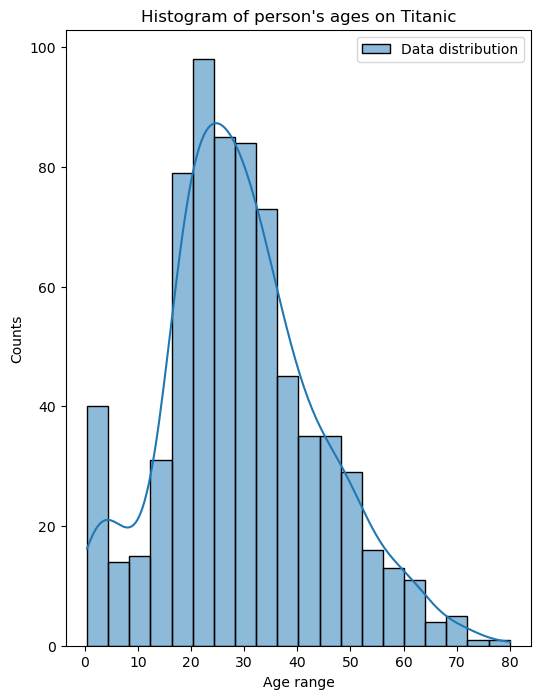

In [79]:
plt.figure(figsize=(6,8))
sns.histplot(x='Age',bins=20,data=df_train,kde=True,label='Data distribution')
plt.xlabel('Age range')
plt.ylabel('Counts')
plt.legend()
plt.title('Histogram of person\'s ages on Titanic')

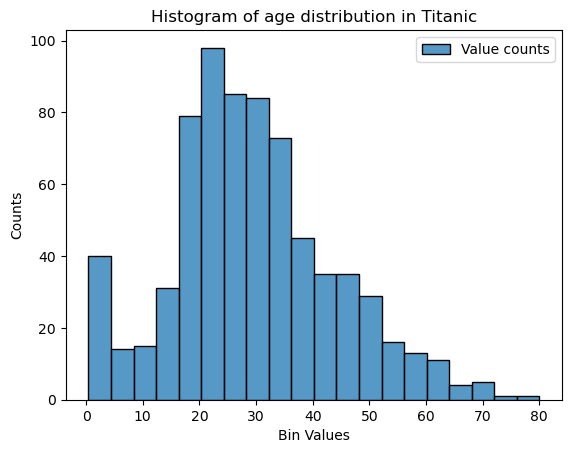

In [94]:
plot = sns.histplot(x='Age',bins=20,data=df_train,label='Value counts')
counts, bin_edges, _ = plt.hist(df_train['Age'],bins=20,alpha=0)
max_bin = bin_edges[counts.argmax()], bin_edges[counts.argmax()+1]
plt.xlabel('Bin Values')
plt.ylabel('Counts')
plt.title('Histogram of age distribution in Titanic')
plt.legend()
plt.show()

In [99]:
print(f'The bin with the maximum counts is {max_bin}')
print(max(counts))

The bin with the maximum counts is (20.315, 24.294000000000004)
98.0


We can extend the histogram to see the same distribution but now by age.


Text(0.5, 1.0, 'Histogram of ages according to gender')

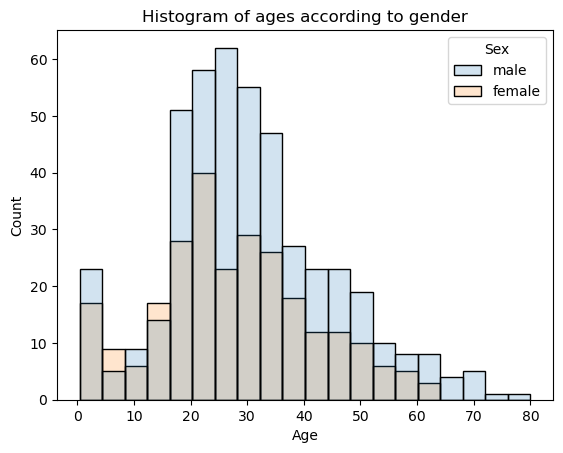

In [180]:
sns.histplot(x='Age',data=df_train,bins=20,hue='Sex',element='bars',alpha=0.2,common_bins=True)
plt.title('Histogram of ages according to gender')
# sns.histplot(x='Age',data=df_train[df_train['Sex']=='female'],bins=20,element='bars',alpha=0.4,common_bins=True)

(0.0, 100.0)

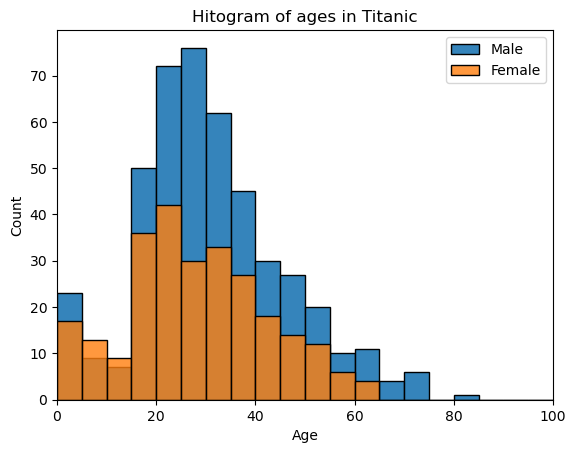

In [254]:
# Plotting separately with alpha for transparency
bin_edges = range(0, 101, 5)  # Adjust the bin width and range as needed

sns.histplot(x='Age', data=df_train[df_train['Sex']=='male'], bins=bin_edges, element='bars', alpha=0.9, label='Male')
sns.histplot(x='Age', data=df_train[df_train['Sex']=='female'], bins=bin_edges, element='bars', alpha=0.8,label='Female')
plt.title('Hitogram of ages in Titanic')
plt.legend()
# Set common x-axis limits
plt.xlim(0, 100)  # Adjust the range as needed for your dataset


In [252]:
df_filt = df_train[df_train['Sex']=='male'].dropna(subset=['Age']).sort_values('Age').reset_index()
sage = df_filt[df_filt['Survived']==0]
sage
#sage = df_filt['Age'].value_counts().sort_index().reset_index()
#sage

,Age,count
0,0.42,1
1,0.67,1
2,0.83,2
3,0.92,1
4,1.00,5
...,...,...
77,70.00,2
78,70.50,1
79,71.00,2
80,74.00,1



Now, let's analyze the range distribution of those who died and those who lived according to sex.

<Axes: xlabel='Age', ylabel='Count'>

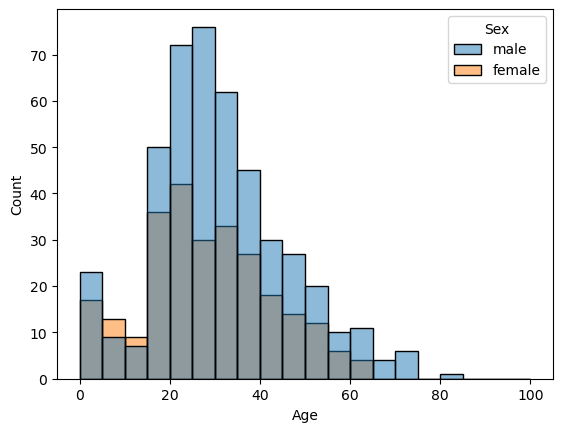

In [257]:
sns.histplot(x='Age',bins=bin_edges,data=df_train,hue='Sex')

Text(0.5, 1.0, 'Percentage of dead persons according to sex')

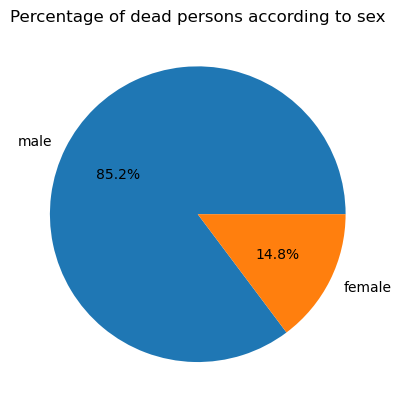

In [200]:
die = df_train[df_train['Survived']==0]
plt.figure()
plt.pie(die['Sex'].value_counts(),labels=die['Sex'].value_counts().index,autopct='%1.1f%%')
plt.title('Percentage of dead persons according to sex')

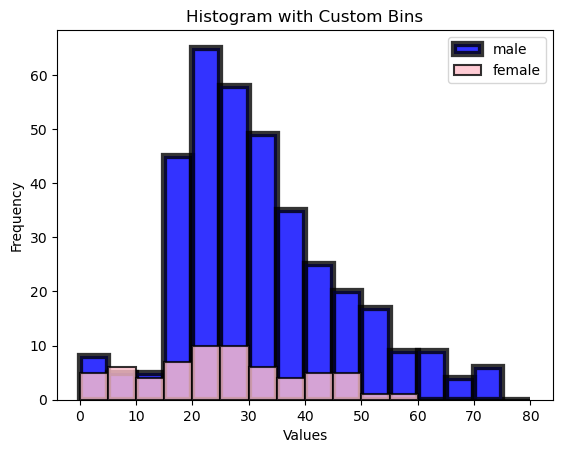

In [261]:
bins = range(0,83,5)
# Plotting the histogram with custom bins
malesd = die['Age'][die['Sex']=='male']
femalesd = die['Age'][die['Sex']=='female']
plt.hist(malesd, bins=bins,alpha=0.8,color='blue',edgecolor='black', linewidth=4.5,label='male')
plt.hist(femalesd, bins=bins,alpha=0.8,color='pink',edgecolor='black', linewidth=1.5,label='female')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram with Custom Bins')
plt.legend()
plt.show()